# ORIE 4580/5580/5581 Assignment 3

#### Students: Danielle Xu (dzx4) and Vicki Yang (vzy3)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [2]:
pip install scipy

In [3]:
#importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


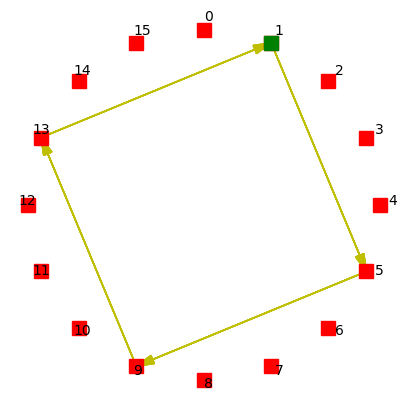

[0.11764706 0.35294118 0.58823529 0.82352941 0.11764706 0.35294118
 0.58823529 0.82352941 0.11764706 0.35294118 0.58823529 0.82352941
 0.11764706 0.35294118 0.58823529 0.82352941 0.11764706]


In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

# Question: consider two LCGs, 𝑥𝑛+1=(5𝑥𝑛)mod16 and  𝑦𝑛+1=(2𝑦𝑛)mod7. Starting both with seed  𝑥0=𝑦0=1

m1 = 16
a1 = 5
c1 = 0
seed1 = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m1+1,m=m1,a=a1,c=c1,seed = seed1)

plot_clock_face(m1,fig,annotate = True)
plot_clock_path(m1,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

print(x)

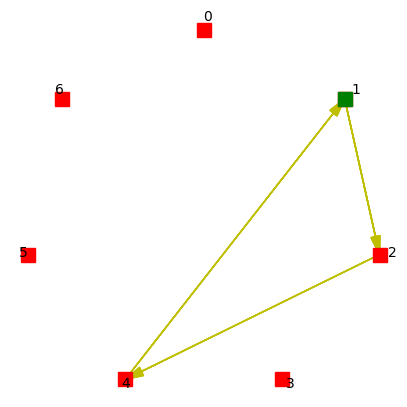

In [ ]:
# Consider two LCGs,  𝑥𝑛+1=(5𝑥𝑛)mod16 and  𝑦𝑛+1=(2𝑦𝑛)mod7. Starting both with seed  𝑥0=𝑦0=1

m2 = 7
a2 = 2
c2 = 0
seed2 = 1

fig = plt.figure(figsize=(5,5))
y = LCG(n=m2+1,m=m2,a=a2,c=c2,seed = seed2)
# y = LCG(n=17,m=m2,a=a2,c=c2,seed = seed2)

plot_clock_face(m2,fig,annotate = True)
plot_clock_path(m2,y,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()



___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

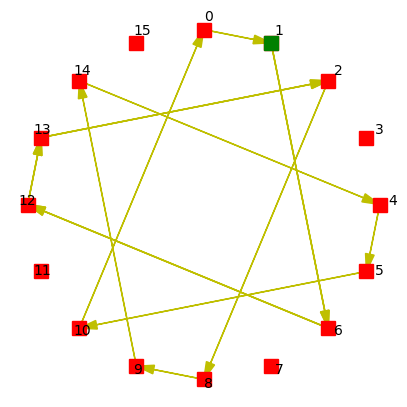

In [ ]:
# Calculate Z


y2 = LCG(n=17,m=m2,a=a2,c=c2,seed = seed2)
z_a = x+y2
mod_z = z_a
# un-normalize z
z= ((x*(m1+1)-1) + (y2*(m2+1)-1))% 16
# print(z_a)

m_z = 16
c_z = 0
seed_z = 1


fig = plt.figure(figsize=(5,5))

# z = LCG(n=m_z+1,m=m_z,a=z_a[i],c=c_z,seed = seed_z)

plot_clock_face(m_z,fig,annotate = True)
plot_clock_path(m_z,z,fig)
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
The periods of each: $x_n = 4, y_n$ = 3 and $z_n = 12$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

$ F^{-1}(y)= y $ for $0 \leq x < \frac{1}{2}$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

(array([0.40818619, 0.23525569, 0.10007145, 0.0711034 , 0.02370113,
        0.02018985, 0.00965602, 0.00614474, 0.00175564, 0.00175564]),
 array([3.99841476e-04, 1.13958587e+00, 2.27877189e+00, 3.41795792e+00,
        4.55714395e+00, 5.69632997e+00, 6.83551600e+00, 7.97470202e+00,
        9.11388805e+00, 1.02530741e+01, 1.13922601e+01]),
 <BarContainer object of 10 artists>)

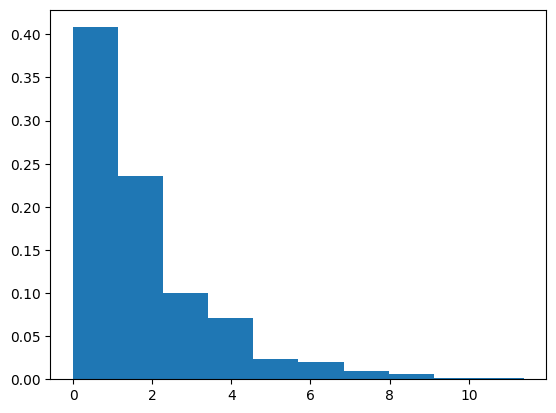

In [47]:
U = np.random.rand(1000)
# inverse function F^-1(U) = log(1-x)/log(1-p)
X = np.log(1-U)/np.log(1-0.42)

plt.hist(X, density=True)

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

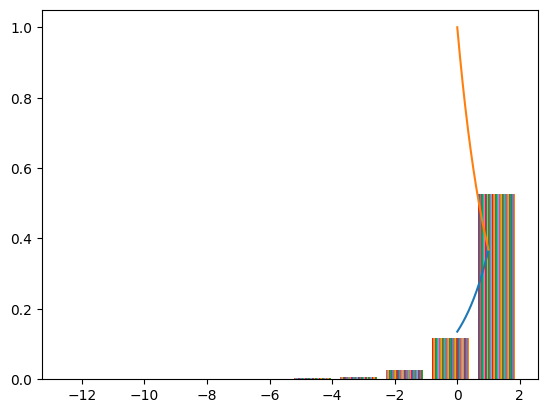

In [14]:
# generate uniform RVs
# sample X by inputting the RVs into the inverse function F^-1(U)

U = np.random.rand(1000)
X = []

for u in U:
  if u >= 0 and u <= 2:
    X.append(np.log(U)+2)
  elif u > 2:
    X.append(-np.log(U))

plt.hist(X, density=True)

x = np.arange(0,1, 0.001)

y1 = np.exp(x-2)
y2 = np.exp(-x)

plt.plot(x, y1)
plt.plot(x, y2)

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


In [ ]:
# Define function
def function(x):
    return (5*(x**4) + 4*(x**3) + 3*(x**2) + 1)/4

def accept_reject(N):
    a = 0
    b = 1
    M = 3.25

    n_accept = 0
    x_list = []
    total_tries = N
    while n_accept < N:
        z1 = a + (b-a)*np.random.rand()
        z2 = np.random.rand()
#         print(f"z1: {z1/M}")
#         print(f"z2: {z2}")
        if z2 < function(z1)/ M:
            n_accept += 1
            x_list.append(z1)
        else:
            total_tries+=1
    return x_list, total_tries

# y,z=accept_reject(5)
# print(y)
# print(z)

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

In [ ]:
num_samples = []
for i in range(100000):
    y,z = accept_reject(1)
    num_samples.append(z)

# print(num_samples)
average_samples = sum(num_samples)/len(num_samples)
print(average_samples)

3.25813


### Ans.


___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


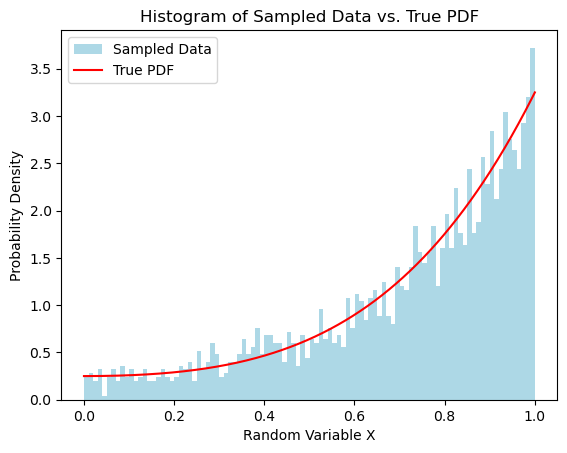

Total tries: 8349


In [ ]:
samples, total_tries = accept_reject(2500)

# Histogram of samples
plt.hist(samples, bins=100, density=True, label='Sampled Data', color='lightblue')

# Plot true pdf
x_values = np.linspace(0, 1, 1000)
true_pdf = function(x_values)
plt.plot(x_values, true_pdf, color='r', label='True PDF')

# Graph
plt.xlabel('Random Variable X')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Histogram of Sampled Data vs. True PDF')
plt.show()

print(f"Total tries: {total_tries}")

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

In [6]:
# first, generate uniform random vars
# next, sample X by inputting the generated uniform rvs into the function G^-1(U)
U = np.random.rand(1000)
X = np.sqrt(-2*np.log(U*np.sqrt(2*np.pi)))

print(X)

[       nan        nan 2.00963845 2.21360636        nan 0.39737876
 2.21841581        nan        nan 1.86731369        nan        nan
        nan        nan        nan        nan        nan 1.27419232
        nan 2.21328136 0.47276874 0.62198512        nan        nan
        nan 2.58515274 1.04402593 0.43619323        nan        nan
        nan        nan 0.63182786        nan 1.91665362        nan
        nan 2.25162695 2.28123236        nan        nan 2.08702749
        nan        nan        nan        nan 2.37406085        nan
        nan        nan        nan 2.69613081        nan 1.51008527
        nan 1.08223949        nan 0.9988804  1.95624375        nan
        nan 1.36638647 1.41734785        nan        nan        nan
 0.6259127         nan        nan        nan        nan        nan
 0.99759096 2.53587212        nan        nan        nan        nan
 0.24235389        nan 0.78684068        nan 0.5843527  2.47072142
        nan 0.762511          nan        nan 0.94503903 0.6846

<ipython-input-6-d9c36d257b3b>:4: RuntimeWarning: invalid value encountered in sqrt
  X = np.sqrt(-2*np.log(U*np.sqrt(2*np.pi)))


___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

$$
k*e^{-|x|}/2 \geq \frac{e^{-x^2/2}}{\sqrt{2\pi}} \\
k \geq \frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{e^{-|x|}/2} \\
k \geq \frac{2\sqrt{e}}{\sqrt{\pi}}e^{\frac{-(|x|-1)^2}{2}} \\
k \geq \sqrt{\frac{2e}{\pi}}e^{\frac{-(|x|-1)^2}{2}} \forall\,x\in\mathbb{R}
$$

The smallest value of k such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$ is equal to the maximum value of $\frac{f(x)}{g(x)}$. $\frac{f(x)}{g(x)}$ is maximized at $x=1$ so the smallest value of k such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$ is $k=1.315$

\\

The expected number of samples needed for generating each sample is the number of times that a sample will be rejected before a sample is generated. Therefore, E[number of samples needed for a single acceptance] = 1/P(U $\leq \frac{f(x)}{1.315*g(x)}$) where $f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$ and $g(x) = \frac{e^{-|x|}}{2}$


___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

Average number of samples needed to generate 1000 samples = 3676.470588235294
95% confidence interval = [3.108725761580406, 4.244215414890181]


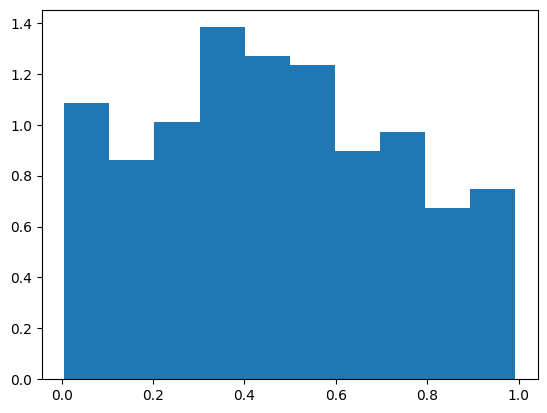

In [45]:
U = np.random.rand(1000)
V = 1.316*np.random.rand(1000)

X = []
p = []
j = 0

for i in range(1000):
  if V[i] < (np.exp((-U[i]**2)/2))/(np.sqrt(2*np.pi)):
    X.append(U[i])
    p.append(1)
    j += 1
  else:
    if len(p) == j:
        p.append(1)
    else:
      p[j] += 1


plt.hist(X, density=True)

E = np.mean(p)
V = np.var(p)

print("Average number of samples needed to generate 1000 samples = " + str(1000*E))

CI_lower = E - 1.96 * V/np.sqrt(1000)
CI_upper = E + 1.96 * V/np.sqrt(1000)
print("95% confidence interval = [" + str(CI_lower) + ", " + str(CI_upper) + "]")

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

<ipython-input-15-a2aae3444359>:4: RuntimeWarning: invalid value encountered in sqrt
  X = np.sqrt((1/(U*np.pi))-1)


(array([0.57542311, 0.39871838, 0.15858117, 0.09967959, 0.08608692,
        0.02718534, 0.01812356, 0.01359267, 0.01812356, 0.00906178,
        0.        , 0.        , 0.        , 0.00453089, 0.        ,
        0.        , 0.        , 0.        , 0.00453089, 0.00453089,
        0.        , 0.        , 0.        , 0.        , 0.00453089]),
 array([ 0.0421214 ,  0.74501044,  1.44789948,  2.15078852,  2.85367756,
         3.5565666 ,  4.25945564,  4.96234468,  5.66523372,  6.36812276,
         7.0710118 ,  7.77390084,  8.47678988,  9.17967892,  9.88256796,
        10.585457  , 11.28834604, 11.99123508, 12.69412412, 13.39701317,
        14.09990221, 14.80279125, 15.50568029, 16.20856933, 16.91145837,
        17.61434741]),
 <BarContainer object of 25 artists>)

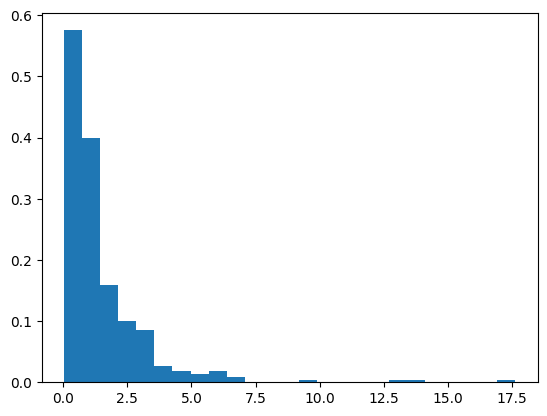

In [15]:
# first, generate uniform random vars
# next, sample X by inputting the generated uniform rvs into the function G^-1(U)
U = np.random.rand(1000)
X = np.sqrt((1/(U*np.pi))-1)

# print(X)

plt.hist(X, bins = 25, density=True)

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.

$$
k*\frac{1}{\pi(1+x^2)} \geq \frac{e^{-x^2/2}}{\sqrt{2\pi}} \\
k \geq \frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{1}{\pi(1+x^2)}} \\
k \geq  \frac{e^{-x^2/2}*\pi(1+x^2)}{\sqrt{2\pi}} \forall\,x\in\mathbb{R}
$$

\\

The smallest value of k such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$ is equal to the maximum value of $\frac{f(x)}{g(x)}$. $\frac{f(x)}{g(x)}$ is maximized at $x=1$ so the smallest value of k such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$ is $k=1.52$

\\

The expected number of samples needed for generating each sample is the number of times that a sample will be rejected before a sample is generated. Therefore, E[number of samples needed for a single acceptance] = 1/P(U $\leq \frac{f(x)}{1.52*g(x)}$) where $f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$ and $g(x) = \frac{1}{\pi(1+x^2)}$

Average number of samples needed to generate 1000 samples = 7142.857142857143
95% confidence interval = [4.353222282163006, 9.93249200355128]


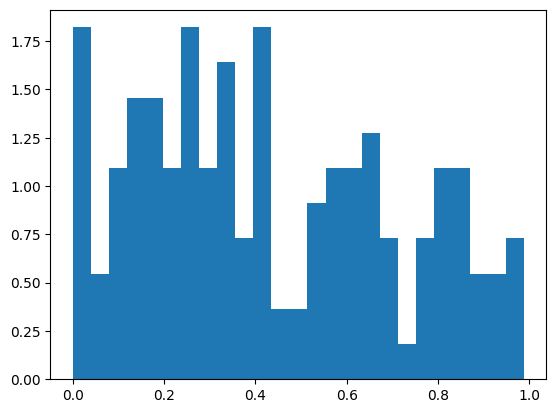

In [46]:
U = np.random.rand(1000)
V = 1.53*np.random.rand(1000)

X = []
p = []
j = 0

for i in range(1000):
  if V[i] < 1/(np.pi*(1+U[i]**2)):
    X.append(U[i])
    p.append(1)
    j += 1
  else:
    if len(p) == j:
        p.append(1)
    else:
      p[j] += 1

plt.hist(X, bins=25, density=True)

E = np.mean(p)
V = np.var(p)

print("Average number of samples needed to generate 1000 samples = " + str(1000*E))

CI_lower = E - 1.96 * V/np.sqrt(1000)
CI_upper = E + 1.96 * V/np.sqrt(1000)
print("95% confidence interval = [" + str(CI_lower) + ", " + str(CI_upper) + "]")